# 1.Problem Statement

Predicting the Avocado’s Average Price based on different features.

Choosing the right model would be challenge since there are different features.

We will try to find the best fit model through Residuals since they are a measure of how far from the regression line data points are. 

RMSE is a measure of how spread out these residuals are. 

In other words, it tells you how concentrated the data is around the line of best fit.

Since we need to find the best fit Model, i have decided to try 3 Models
> Multiple Linear Regression Model

> Decision Tree Regressor Model

> Random Forest Regressor Model

 

# 2.Installing, Importing and Upgrading Libraries

In [ ]:
!pip install pandas-profiling --upgrade

In [ ]:
#importing libraries
import pandas_profiling
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split                     
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score,mean_squared_error                         
import sklearn.metrics as metrics
import warnings                                                     
warnings.filterwarnings("ignore")    
import os
import datetime                               

# 3.Data Acquisition

In [ ]:
#clearing the variable
dataset_path = ""

#setting the path of ipl dataset in a variable
dataset_path = "/content/avocado.csv"

data_preread_df = pd.read_csv(dataset_path, index_col=0, encoding='latin-1') 
print('Data Shape:', data_preread_df.shape)
data_preread_df.head()


Data Shape: (18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed,,,,,,,,,,,,,
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# 4.Data Pre-Profiling

In [ ]:
profile = pandas_profiling.ProfileReport(data_preread_df)
profile.to_file(output_file="Pre Profiling Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 5.Data Pre-Processing

In [ ]:
#clearing the variable
predataset_path = ""


#setting the path of dataset in a variable
predataset_path = "/content/avocado.csv"

data_read_df = pd.read_csv(predataset_path, index_col=0) 
print('Data Shape:', data_preread_df.shape)
data_read_df.head()


Data Shape: (18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed,,,,,,,,,,,,,
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
data_read_df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
data_read_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# 6.Data Post-Profiling

In [ ]:
Post_profile = pandas_profiling.ProfileReport(data_read_df)
Post_profile.to_file(output_file="Post Profiling Report.html")
print('Accomplished')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished


# 7.Exploratory Data Analysis

Adding Month and Day

In [ ]:
data_read_df['Date']=pd.to_datetime(data_read_df['Date'])
data_read_df['Month']=data_read_df['Date'].apply(lambda x:x.month)
data_read_df['Day']=data_read_df['Date'].apply(lambda x:x.day)

In [ ]:
data_read_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Unnamed,,,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Avocado's Average Price through the Date column

Text(0.5, 1.0, 'Average Price')

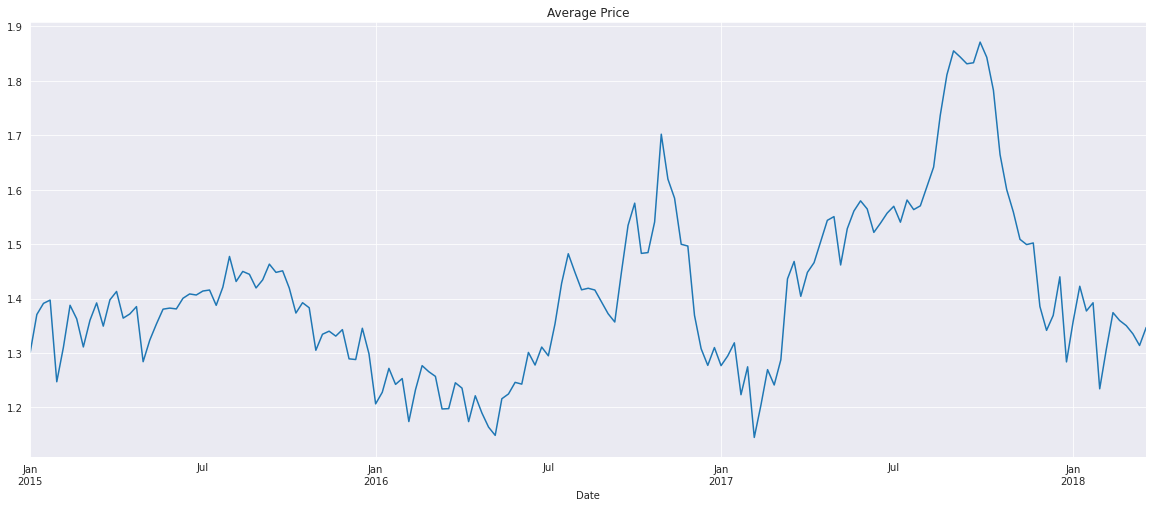

In [ ]:
byDate=data_read_df.groupby('Date').mean()
plt.figure(figsize=(20,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price')

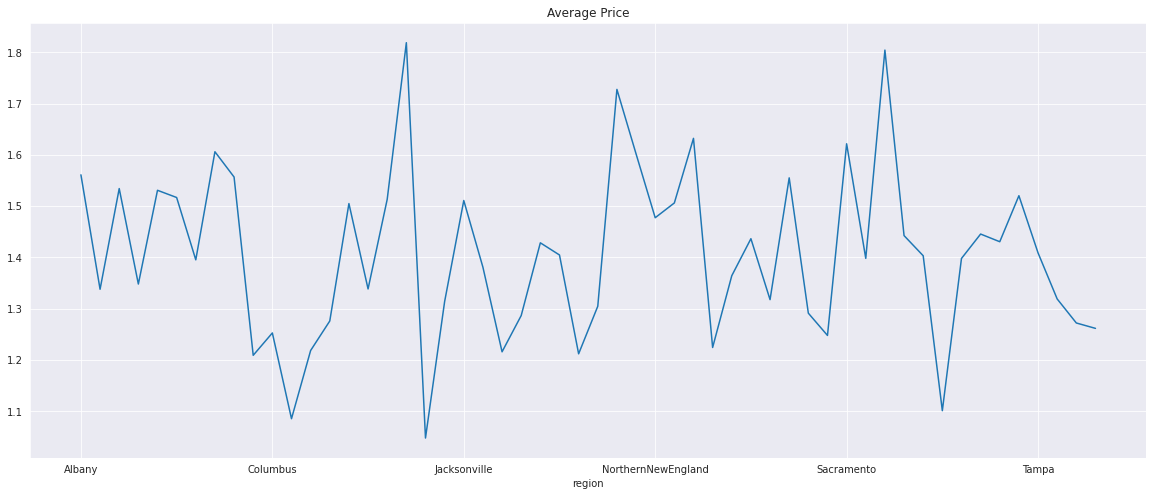

In [ ]:
byRegion=data_read_df.groupby('region').mean()
plt.figure(figsize=(20,8))
byRegion['AveragePrice'].plot()
plt.title('Average Price')

Relationship between our Features(Correlation)

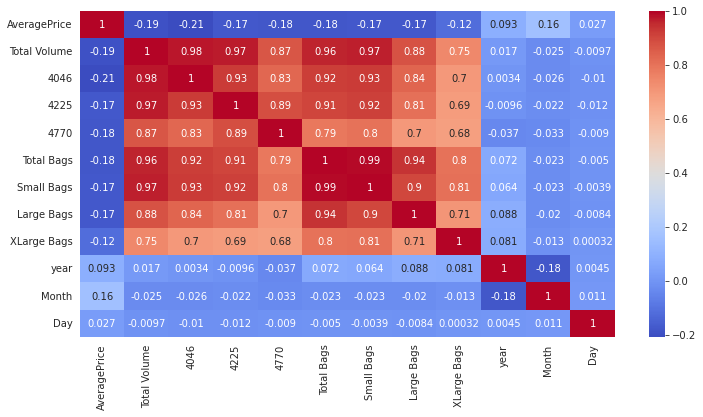

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data_read_df.corr(),cmap='coolwarm',annot=True)

In [ ]:
regions = data_read_df.region.unique()
print(regions)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


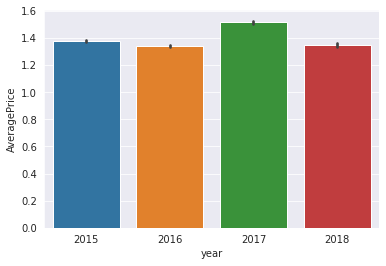

In [ ]:
sns.barplot(x="year", y="AveragePrice", data=data_read_df)

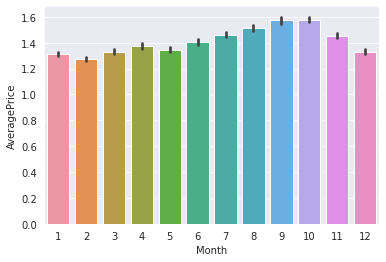

In [ ]:
sns.barplot(x="Month", y="AveragePrice", data=data_read_df)

Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28157ef7d0>,
      dtype=object)

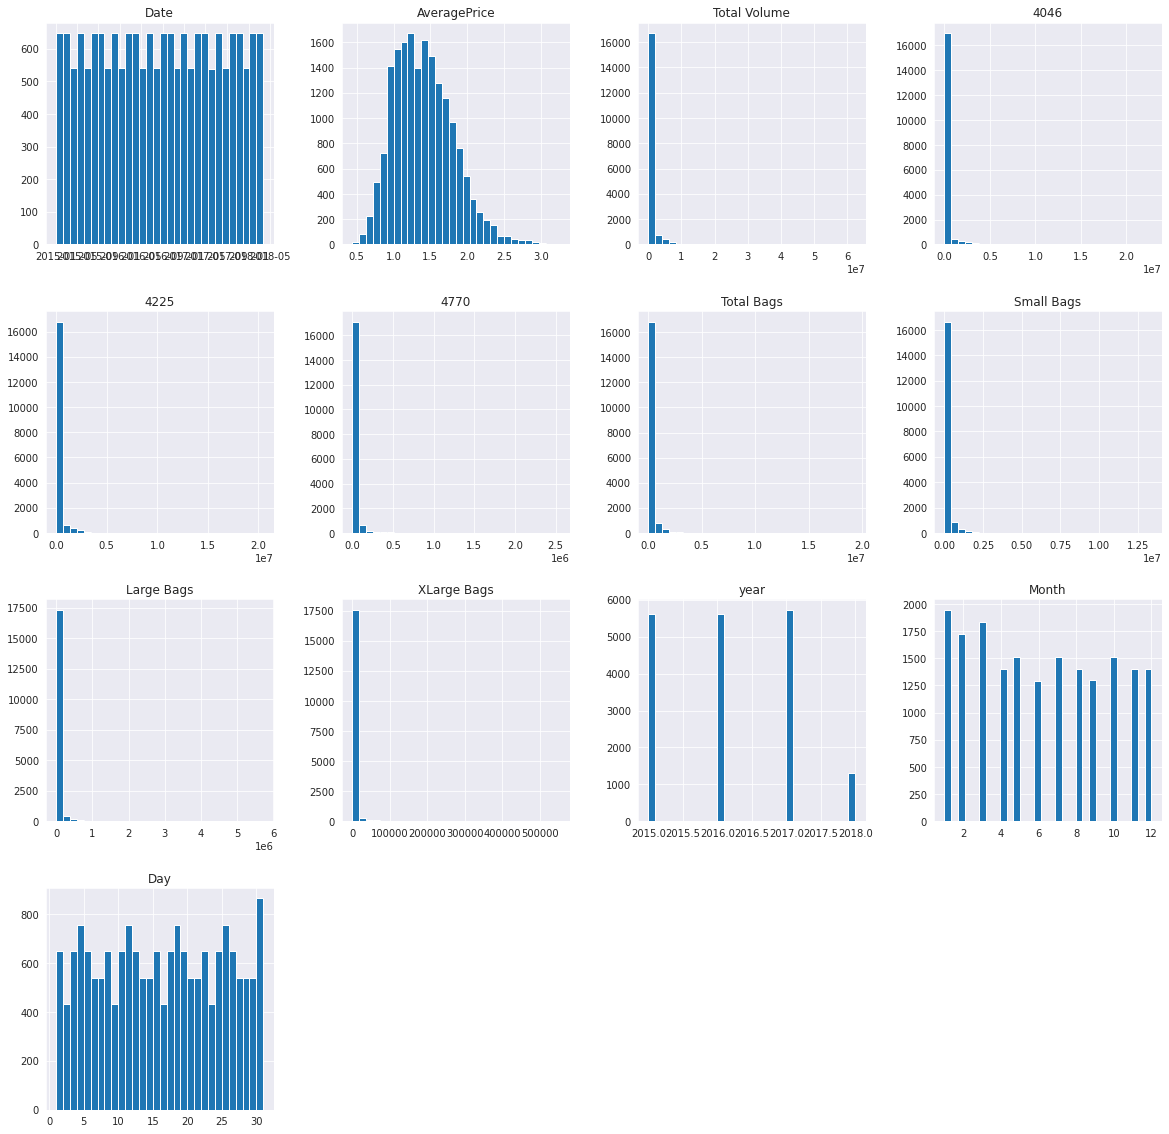

In [ ]:
data_read_df.hist(figsize=(20,20), grid=True,layout=(4,4),bins=30)

In [ ]:
avo=data_read_df
not_cities=['TotalUS','West','California','Midsouth','Northeast','SouthCarolina','SouthCentral','Southeast','GreatLakes','NothernNewEngland']
cities=avo[avo['region'].isin(not_cities)==False]

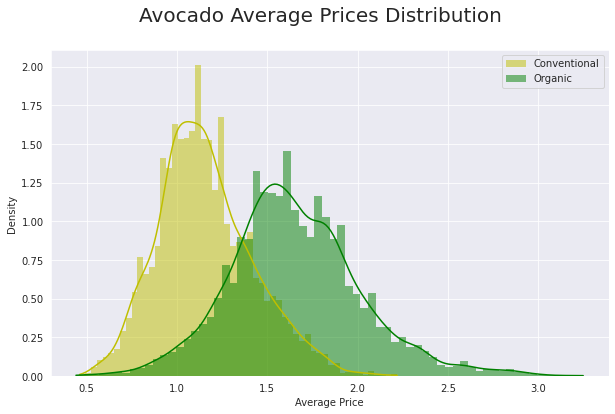

In [ ]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Average Prices Distribution', fontsize = 20)
ax1 = sns.histplot(avo[avo['type']=='conventional']["AveragePrice"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(avo[avo['type']=='organic']["AveragePrice"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

In [ ]:
cities['month']=[x.month for x in cities.Date]
cities['year']=[x.year for x in cities.Date]

In [ ]:
pivot_cities=pd.pivot_table(cities,index=['Date','region'],values=['AveragePrice','Total Volume'])
pivot_cities=pivot_cities.reset_index()
pivot_cities=pivot_cities.rename(columns={'region':'city'})

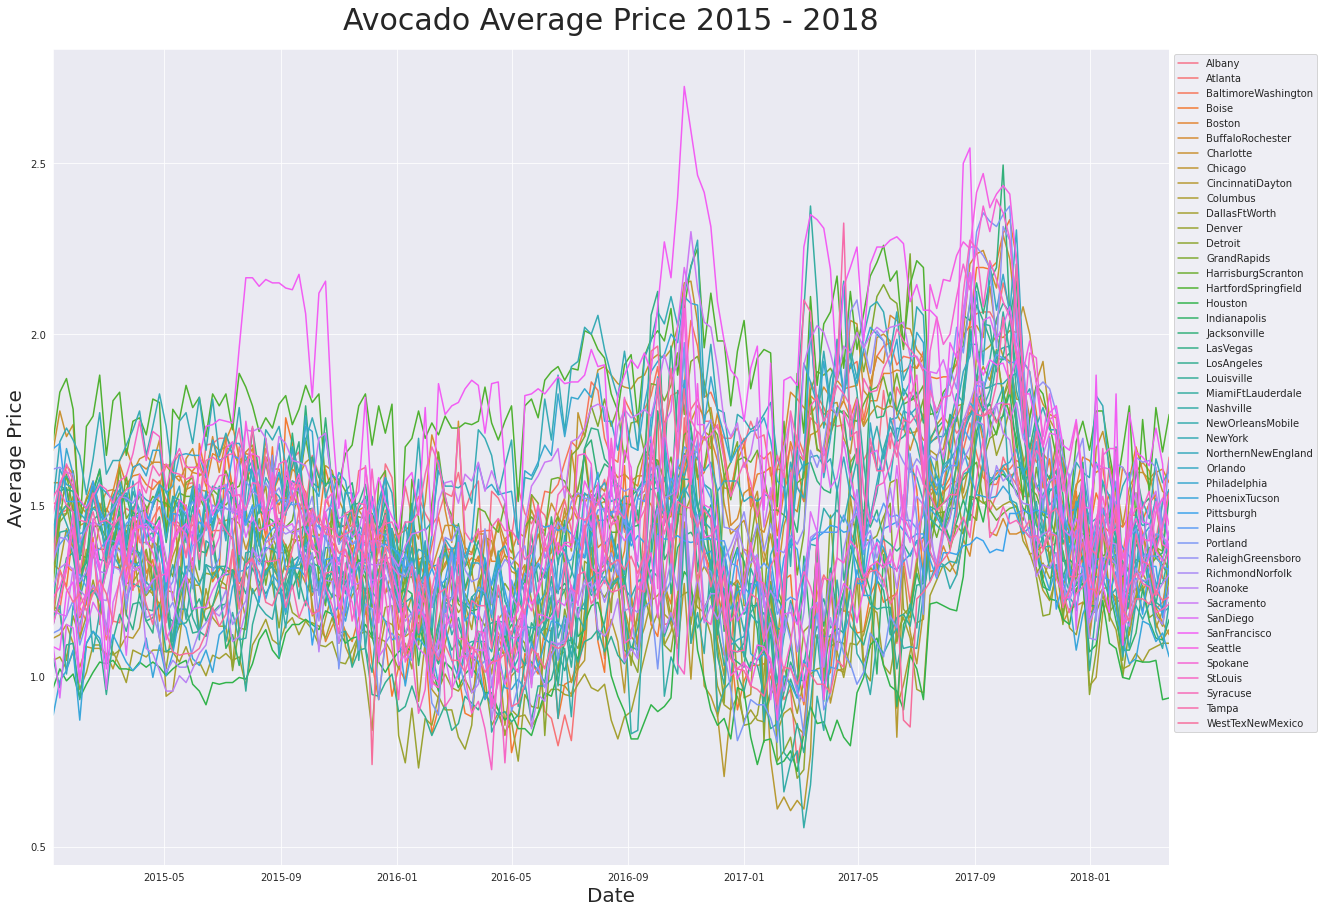

In [ ]:
plt.figure(figsize=(20,15))  
g=sns.lineplot(x='Date', y='AveragePrice', hue='city',data=pivot_cities)
g=g.set_xlim(pivot_cities['Date'].min(), pivot_cities['Date'].max())
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Avocado Average Price 2015 - 2018",pad=20, fontsize=30)
plt.ylabel('Average Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.show(g)

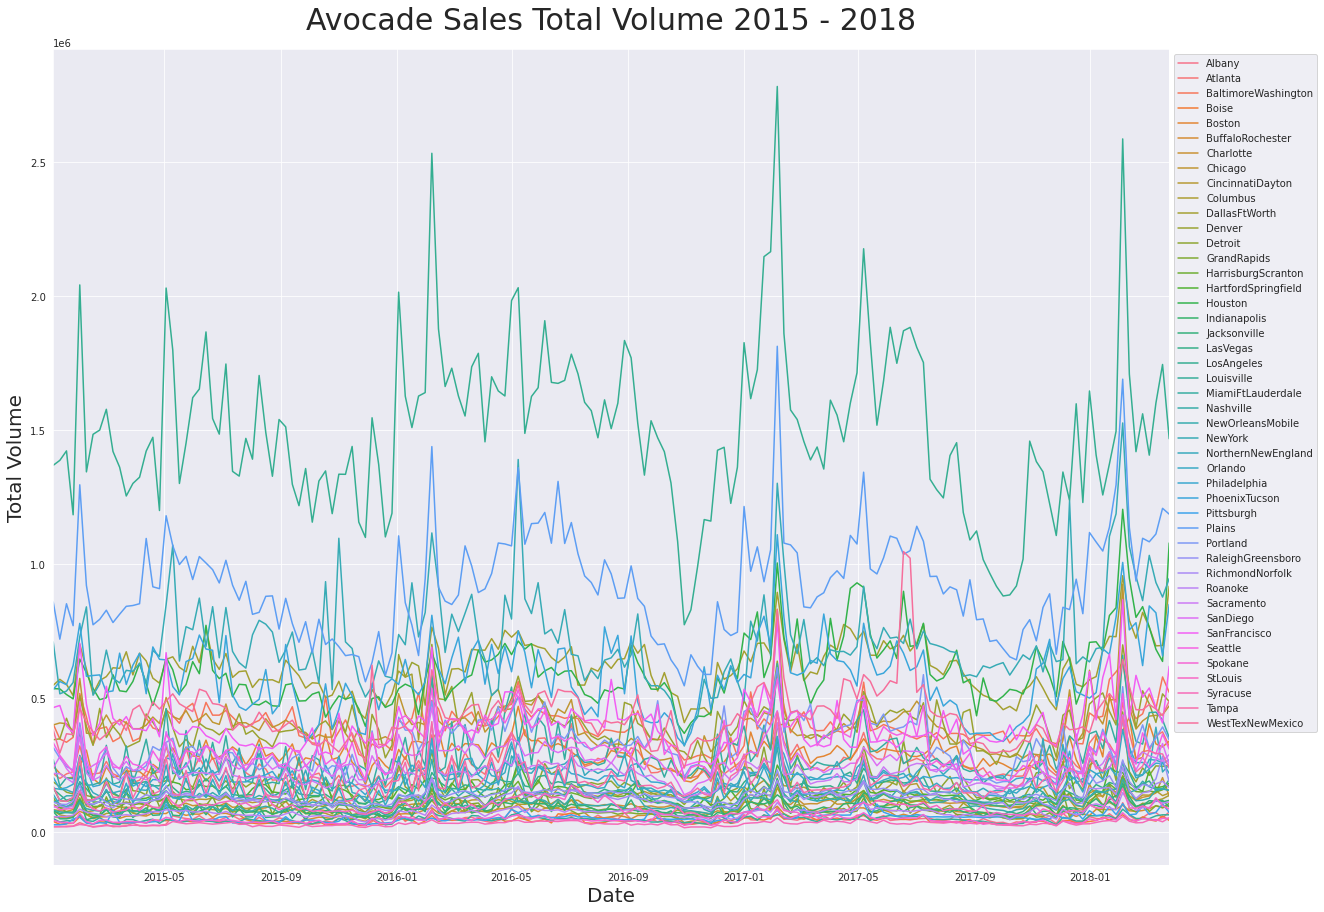

In [ ]:
plt.figure(figsize=(20,15))  
g=sns.lineplot(x='Date', y='Total Volume', hue='city',data=pivot_cities)
g=g.set_xlim(pivot_cities['Date'].min(), pivot_cities['Date'].max())
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Avocade Sales Total Volume 2015 - 2018",pad=20, fontsize=30)
plt.ylabel('Total Volume', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.show(g)

It is interesting to see how total volume and prices fluctuations in each city. Since the both columns have very different scales, I decided to devide the Total Volume column by 1,000,000 and to combine the two charts. 

We can see that Los Angeles, Plains and New York are top consumers of avocado. 

Total volume did not fluctuare much in the rest of the cities. Whereas prices show very active fluctuation in all cities over this period of time. 

Prices went seriously up and down in Chicago, Las Vegas, Seattle, Boise and Atlanta. 

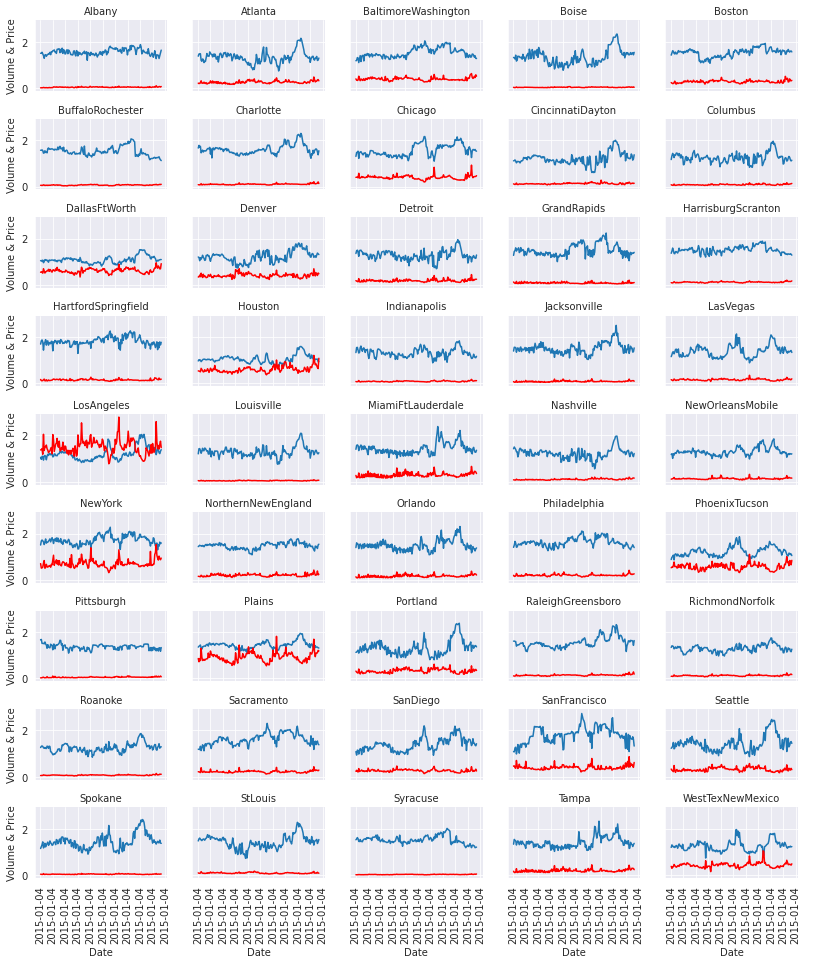

In [ ]:
pivot_cities['TV']=pivot_cities['Total Volume']/1000000
g=sns.FacetGrid(pivot_cities, col='city', col_wrap=5,height=1.5, aspect=1.5)
g=g.map(plt.plot, 'Date','AveragePrice').set_xticklabels([str(x)[:10] for x in pivot_cities['Date']],rotation=90)
g.map(plt.plot, 'Date', 'TV',color='r').set_xticklabels([str(x)[:10] for x in pivot_cities['Date']],rotation=90).set_ylabels('Volume & Price')
g.add_legend()
g.set_titles('{col_name}')

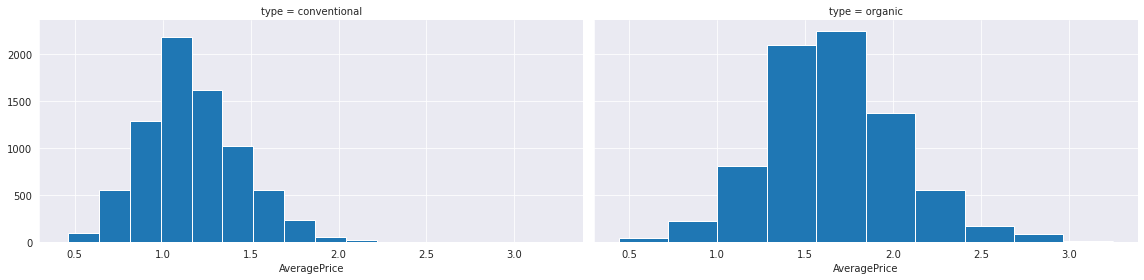

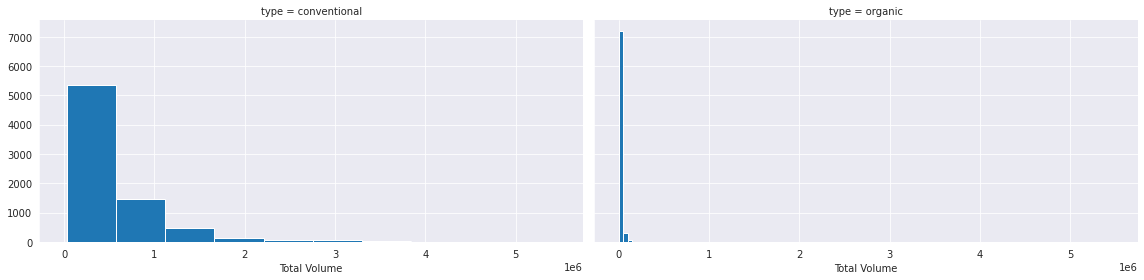

In [ ]:
pivot_cities1=pd.pivot_table(cities,index=['Date','region','type'],values=['AveragePrice','Total Volume'])
pivot_cities1=pivot_cities1.reset_index()

g = sns.FacetGrid(pivot_cities1, col="type",height=4, aspect=2)
g.map(plt.hist, "AveragePrice")

g = sns.FacetGrid(pivot_cities1, col="type",height=4, aspect=2)
g.map(plt.hist, "Total Volume")

Text(0.5, 1.0, 'Total Avocado Consumption per City')

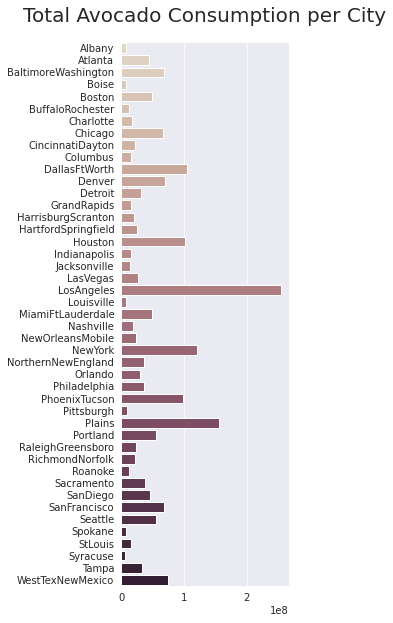

In [ ]:

sum_tot={}
for c in pivot_cities.city:
    a=pivot_cities[pivot_cities['city']==c]
    tot=a['Total Volume'].sum()
    sum_tot[c]=round(tot,2)

cities_list=[i for i in sum_tot.keys()]
val=[i for i in sum_tot.values()]

plt.figure(figsize=(3,10))
sns.barplot(val,cities_list, palette="ch:.25")
plt.title("Total Avocado Consumption per City", pad=20, fontsize=20)

# 8.Post Data Processing

Lets apply Linear Regression because our Target variable 'AveragePrice' is continuous. 

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [ ]:
df_final=pd.get_dummies(data_read_df.drop(['region','Date'],axis=1),drop_first=True)
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 9.Model Development and Evaluation

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291683372
MSE: 0.09108802805353655
RMSE: 0.30180793239001613


The RMSE is low so we can say that we do have a good model, but lets check to be more sure. 

Lets plot the y_test vs the predictions

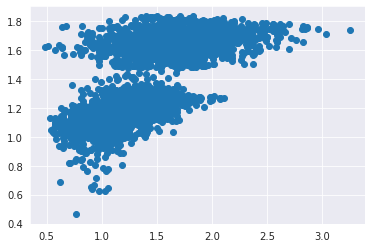

In [ ]:
plt.scatter(x=y_test,y=pred)

In [ ]:
#predicting on test data
y_prediction =  pred
y_prediction

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("Accuracy Score is ",score)

Accuracy Score is  0.4330705934667868


Accuracy Score is 43.3%

As we can see that we dont have a straigt line. This may not be the best model we can apply on our data.

Lets try working with the DecisionTree Regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

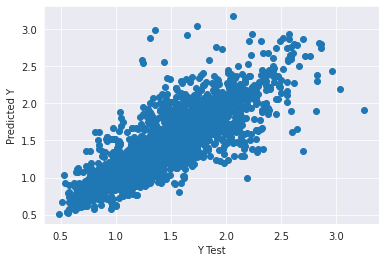

In [ ]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here we can see that we nearly have a straigt line 

In other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13505479452054792
MSE: 0.04457383561643836
RMSE: 0.2111251657582259


In [ ]:
#predicting on test data
y_prediction =  pred
y_prediction

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("Accuracy Score is ",score)

Accuracy Score is  0.7225736607440447


Accuracy Score is 72.25%

Our RMSE is lower than the previous one we got with Linear Regression. 

Lets try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10090476712328766
MSE: 0.02151576322739725
RMSE: 0.14668252529663256


Well as we can see the RMSE is lower than the two previous models. 

Hence the RandomForest Regressor is the best model in this case.

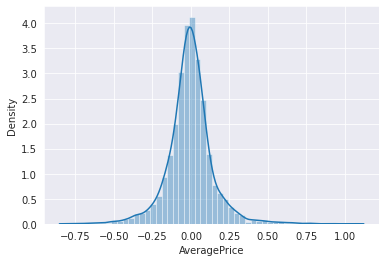

In [ ]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
Unnamed,,
6,0.82,0.9560
8,0.97,1.0005
48,1.44,1.3765
42,0.97,0.9045
45,1.45,1.4401


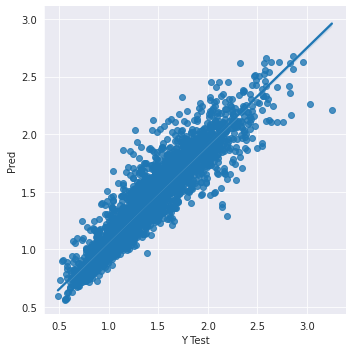

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
#predicting on test data
y_prediction =  pred
y_prediction

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("Accuracy Score is ",score)

Accuracy Score is  0.8660864754866777


Accuracy Score is 86.64%

# 10.Conclusion

Los Angeles, Plains and New York are top consumers of avocado. 

Total volume did not fluctuare much in the rest of the cities. Whereas prices show very active fluctuation in all cities over this period of time.

Prices went seriously up and down in Chicago, Las Vegas, Seattle, Boise and Atlanta. 

Highest price of conventional avocados is around 1.2, Highest price of organic avocados is around 1.8. 
Combination of both types of avocados puts average price at 1.4 More conventional types were sold.


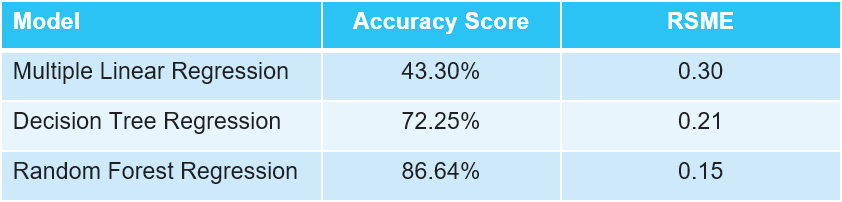


Looking at the above statistics, Random Forest Regression Model is the best suited for Predicting the Average Prices of Avocado 